https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.utils import shuffle
import os
from os.path import join
import argparse
import random
import pickle
import cv2
import os, fnmatch

# import zipfilefrom sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers.core import Dense
# from keras.optimizers import SGD
# from imutils import paths

%matplotlib inline


print(tf.__version__)

1.13.1


In [2]:
# # Creates a graph.
# c = []
# with tf.device(get_available_gpus()[-1]):
#     a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
#     b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
#     c.append(tf.matmul(a, b))
# with tf.device('/cpu:0'):
#     sum = tf.add_n(c)
# # Creates a session with log_device_placement set to True.
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# # Runs the op.
# print(sess.run(sum))


In [3]:
Labels = []
def find_files(directory, pattern):
   for root, dirs, files in os.walk(directory):
       for basename in files:
           if fnmatch.fnmatch(basename, pattern):
               filename = os.path.join(root, basename)
               yield filename


for filename in find_files('/data/home/maj/notebooks/w210-final-project/MAJ/Frame_Labels/PSPI/', '*.txt'):
   Labels.append(filename)

Labels_df = pd.DataFrame(data=Labels)

Labels_df.shape


(48398, 1)

In [9]:
# #Trying to figure out if GPU is working and how it works.
# #I am not able to see the logs...it's a bug
# #https://www.tensorflow.org/guide/using_gpu
# tf.logging.set_verbosity(tf.logging.INFO)

# # Creates a graph.
# c = []
# for d in get_available_gpus():
#     with tf.device(d):
#         a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
#         b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
#         c.append(tf.matmul(a, b))
# with tf.device('/cpu:0'):
#     sum = tf.add_n(c)
# # Creates a session with log_device_placement set to True.
# sess = tf.Session(config=tf.ConfigProto(
#       allow_soft_placement=True, log_device_placement=True))
# # Runs the op.
# print(sess.run(sum))

# tf.logging.info('Stored priming notes: %s', d) 


In [11]:
# print(Labels_df[0:1])

In [4]:
images_path = []
def find_files(directory, pattern):
   for root, dirs, files in os.walk(directory):
       for basename in files:
           if fnmatch.fnmatch(basename, pattern):
               filename = os.path.join(root, basename)
               yield filename


for filename in find_files('/data/home/maj/notebooks/w210-final-project/MAJ', '*.png'):
   images_path.append(filename)


images_path_df = pd.DataFrame(data=images_path)

images_path_df.shape

(48398, 1)

In [5]:
images = []
sequences = []
image_sequences = []

pspi_scores = []
opr_scores = []

aff_scores = []
sen_scores = []
vas_scores = []

for subject_id in os.listdir('Images'):
    if subject_id != '.DS_Store':
        for sequence_id in os.listdir(join('Images', subject_id)):
            if sequence_id != '.DS_Store':
                sequences.append(sequence_id)
                for image in os.listdir(join('Images', subject_id, sequence_id)):
                    if image != '.DS_Store':
                        images.append(image.split('.')[0])
                        image_sequences.append(sequence_id)
                for pspi_file in os.listdir(join('Frame_Labels', 'PSPI', subject_id, sequence_id)):
                    with open(join('Frame_Labels', 'PSPI', subject_id, sequence_id, pspi_file), 'r') as f_in:
                        pspi_scores.append(float(f_in.read().strip()))
        for aff_file in os.listdir(join('Sequence_Labels', 'AFF', subject_id)):
            with open(join('Sequence_Labels', 'AFF', subject_id, aff_file), 'r') as f_in:
                aff_scores.append(float(f_in.read().strip()))
        for opr_file in os.listdir(join('Sequence_Labels', 'OPR', subject_id)):
            with open(join('Sequence_Labels', 'OPR', subject_id, opr_file), 'r') as f_in:
                opr_scores.append(float(f_in.read().strip()))
        for sen_file in os.listdir(join('Sequence_Labels', 'SEN', subject_id)):
            with open(join('Sequence_Labels', 'SEN', subject_id, sen_file), 'r') as f_in:
                sen_scores.append(float(f_in.read().strip()))
        for vas_file in os.listdir(join('Sequence_Labels', 'VAS', subject_id)):
            with open(join('Sequence_Labels', 'VAS', subject_id, vas_file), 'r') as f_in:
                vas_scores.append(float(f_in.read().strip()))

image_data = {'image': images,
              'image_sequence': image_sequences,
              'pspi_score': pspi_scores}

sequence_data = {'sequence': sequences, 
                 'aff_score': aff_scores, 
                 'opr_score': opr_scores, 
                 'sen_score': sen_scores,
                 'vas_score': vas_scores}

image_df = pd.DataFrame(data=image_data)
sequence_df = pd.DataFrame(data=sequence_data)


In [6]:
print ('Examples of image identifiers:\n{}\n'.format(images[:10]))
print ('Examples of sequence identifiers:\n{}\n'.format(sequences[:10]))
print ('Examples of PSPI scores:\n{}\n'.format(pspi_scores[:10]))
print ('Examples of AFF scores:\n{}\n'.format(aff_scores[:10]))
print ('Examples of OPR scores:\n{}\n'.format(opr_scores[:10]))
print ('Examples of SEN scores:\n{}\n'.format(sen_scores[:10]))
print ('Examples of VAS scores:\n{}\n'.format(vas_scores[:10]))

Examples of image identifiers:
['fn059t2afunaff048', 'fn059t2afunaff405', 'fn059t2afunaff119', 'fn059t2afunaff163', 'fn059t2afunaff003', 'fn059t2afunaff005', 'fn059t2afunaff022', 'fn059t2afunaff176', 'fn059t2afunaff287', 'fn059t2afunaff257']

Examples of sequence identifiers:
['fn059t2afunaff', 'fn059t2aiaff', 'jh043t2afunaff', 'jh043t2afaff', 'jh043t2aeunaff', 'jh043t2aiunaff', 'jh043t1afaff', 'jh043t2aeaff', 'jh043t2aaunaff', 'jh043t1aeaff']

Examples of PSPI scores:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Examples of AFF scores:
[7.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 13.0, 5.0]

Examples of OPR scores:
[4.0, 3.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0]

Examples of SEN scores:
[8.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 12.0, 5.0]

Examples of VAS scores:
[6.0, 1.0, 2.0, 0.0, 0.0, 4.0, 0.0, 1.0, 6.0, 3.0]



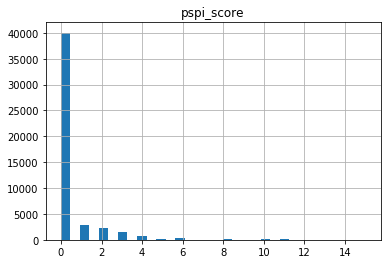

In [11]:
df2 = pd.DataFrame({
         'pspi_score': pspi_scores
         }, index=images)
hist = df2.hist(bins=32)

In [12]:
image_df

,image,image_sequence,pspi_score
0,fn059t2afunaff048,fn059t2afunaff,0.0
1,fn059t2afunaff405,fn059t2afunaff,0.0
2,fn059t2afunaff119,fn059t2afunaff,0.0
3,fn059t2afunaff163,fn059t2afunaff,0.0
4,fn059t2afunaff003,fn059t2afunaff,0.0
5,fn059t2afunaff005,fn059t2afunaff,0.0
6,fn059t2afunaff022,fn059t2afunaff,0.0
7,fn059t2afunaff176,fn059t2afunaff,0.0
8,fn059t2afunaff287,fn059t2afunaff,0.0
9,fn059t2afunaff257,fn059t2afunaff,0.0


In [13]:
pain_data = image_df[['image','pspi_score']]

In [14]:
pain_data


,image,pspi_score
0,fn059t2afunaff048,0.0
1,fn059t2afunaff405,0.0
2,fn059t2afunaff119,0.0
3,fn059t2afunaff163,0.0
4,fn059t2afunaff003,0.0
5,fn059t2afunaff005,0.0
6,fn059t2afunaff022,0.0
7,fn059t2afunaff176,0.0
8,fn059t2afunaff287,0.0
9,fn059t2afunaff257,0.0


In [15]:
#extracting the .png file name from the first dataset and joining with the image & PSPI score dataset
images_path_df

#renaming dataframe column to image path
images_path_df.columns = ['image_path']

# new temp data frame with split value columns 
temp = images_path_df["image_path"].str.split("/", n = 10, expand = True) 
temp.columns = ['zero','one','two','three','four','five','six','seven', 'eight','nine', 'ten']


# Create new temp dataframe that has image name without .png to later do a merge
temp2 = temp["ten"].str.split(".", n = 1, expand = True) 
temp2.columns = ['image','ext']
temp2.drop(columns =["ext"], inplace = True) 

# print(temp2[:1])
# print(images_path_df[:1])

df_columns = pd.concat([images_path_df, temp2], axis =1)
print(df_columns[:1])

# #checking the size
# print('manip:', df_columns.shape)
# print('original:', pain_data.shape)

# #checking the header and first row for each data frame
# print(df_columns[:1])
# print(pain_data[:1])

#doing a merge on the .png value to ensure that the path will match the PSPI value
merged_inner = pd.merge(left=pain_data,right=df_columns, left_on='image', right_on='image')
# print('merged table: ', merged_inner.shape)
# print('New table header: ',merged_inner[:1])

#reordering columns
merged_inner= merged_inner [['image_path', 'image', 'pspi_score']]
merged_inner[:1]

#Final Dataset for pain dataset to by used in CNN
pain_data = merged_inner
print('\nFinal Dataset ready for CNN')

pain_data[:1]




                                          image_path              image
0  /data/home/maj/notebooks/w210-final-project/MA...  fn059t2afunaff048

Final Dataset ready for CNN


,image_path,image,pspi_score
0,/data/home/maj/notebooks/w210-final-project/MA...,fn059t2afunaff048,0.0


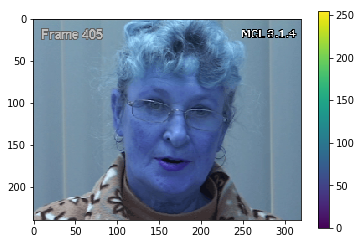

In [16]:
image = cv2.imread(pain_data['image_path'][1])
image = cv2.resize(image, (320, 240))

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

(240, 320, 3)


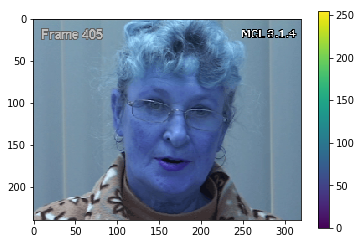

In [17]:
#when transforming to list we lose order. in the next step, we will make sure that we re-match label with path and picture
#by appending to data_pic & pic_path in each loop
list_pain = list(pain_data['image_path'])
list_pain[1]

list_pain = np.array(list_pain)

image = cv2.imread(list_pain[1])
image = cv2.resize(image, (320, 240))
print(image.shape)

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# Shuffle Dataset
random.seed(42)
pain_data = shuffle(pain_data)

# initialize the data and labels


# initialize the data and labels
print("[INFO] loading images...")
data_pic = []
pic_path = []
labels = pain_data['pspi_score']

# loop over the input images
imagePath = list(pain_data['image_path'])

for imagePath in imagePath:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (320, 240))
    data_pic.append(image)
    pic_path.append(imagePath)
    
print("[INFO] Pictures loaded")

[INFO] loading images...
[INFO] Pictures loaded


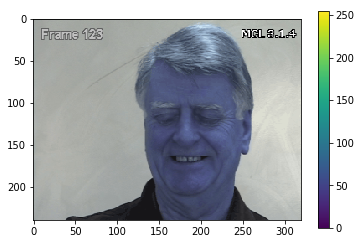

In [19]:
pic_path[0]
image2 = cv2.imread(pic_path[0])
image2 = cv2.resize(image2, (320, 240))

plt.figure()
plt.imshow(image2)
plt.colorbar()
plt.grid(False)
plt.show()


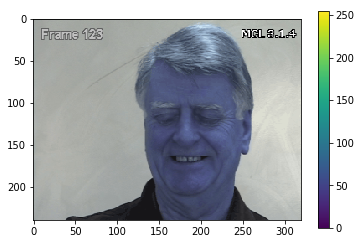

In [20]:
#we should get the same picture here to confirm that the path and picture are the same
plt.figure()
plt.imshow(data_pic[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
pic_path_df = pd.DataFrame(data=pic_path)

In [22]:
pic_path_df.columns = ['image_path']
pic_path_df['image_path'][0]


'/data/home/maj/notebooks/w210-final-project/MAJ/Images/095-tv095/tv095t1afaff/tv095t1afaff123.png'

In [23]:
pain_data['image_path'][0]

'/data/home/maj/notebooks/w210-final-project/MAJ/Images/059-fn059/fn059t2afunaff/fn059t2afunaff048.png'

In [24]:
#checking if merge worked based on output above
final_pain_data = pd.merge(left=pic_path_df,right=pain_data, on='image_path')
final_pain_data[:1]

,image_path,image,pspi_score
0,/data/home/maj/notebooks/w210-final-project/MA...,tv095t1afaff123,4.0


In [25]:
#create final data label to match data pictures
data_label = final_pain_data.copy()
data_label.drop(columns =["image_path","image"], inplace = True) 
data_label.shape




(48398, 1)

In [26]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

['/device:GPU:0', '/device:GPU:1']

In [27]:
data_list = np.array(data_pic)

In [28]:
with tf.device(get_available_gpus()[-1]):   # Notice THIS
    data_pic = data_list
    data_pic = data_pic / 255.0
    data_pic.shape

In [24]:
#final Dataset is ready with two variables
# data_pic containing all pictures
# data_label containing all corresponding labels

In [29]:
#splitting pictures into train and test
#Original split is 33879 however testing for CNN MODEL as it's running out of resources
data_pic_train = data_pic[:33879]
print("train picture data: ", data_pic_train.shape)
data_pic_test = data_pic[33879:]
print("test picture data: ", data_pic_test.shape)

train picture data:  (33879, 240, 320, 3)
test picture data:  (14519, 240, 320, 3)


In [30]:
#Original
#splitting pictures into train and test
data_label_train = data_label[:33879]
print("train label data: ",data_label_train.shape)
data_label_test = data_label[33879:]
print("test label data: ",data_label_test.shape)

train label data:  (33879, 1)
test label data:  (14519, 1)


In [49]:
#trying array version for the fit model
temp =np.array(data_label['pspi_score'])

#splitting pictures into train and test
data_label_train = temp[:33879]
print("train label data: ",data_label_train.shape)
data_label_test = temp[33879:]
print("test label data: ",data_label_test.shape)

train label data:  (33879,)
test label data:  (14519,)


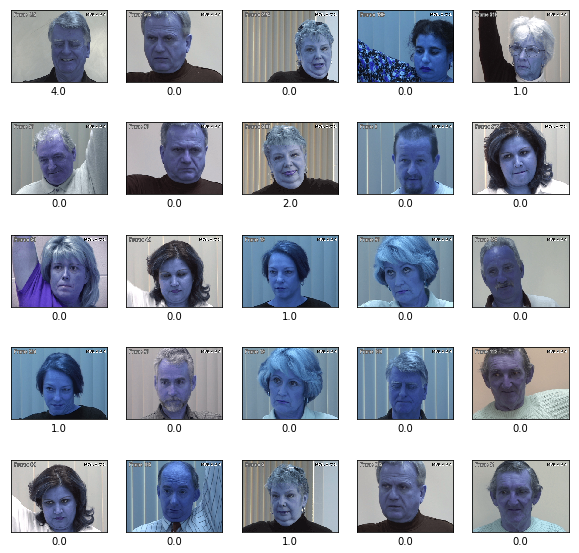

In [51]:
plt.figure(figsize=(10,10))
#original is range(25)
for i in range(25):
    #plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_pic_train[i], cmap=plt.cm.binary)
    plt.xlabel(data_label_train[i])
plt.show()

In [52]:
#https://www.tensorflow.org/tutorials


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(240,320,3)),
  tf.keras.layers.Dense(12800, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(15, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [58]:
for d in ['/device:GPU:0', '/device:GPU:1']:
    with tf.device(d):
        tf.keras.Model.fit(data_pic_train, data_label_train, batch_size = 32, epochs=5)
        tf.keras.Model.evaluate(data_pic_test, data_label_test)

AttributeError: 'numpy.ndarray' object has no attribute '_distribution_strategy'

In [38]:
! nvidia-smi -l 1

OSError: [Errno 12] Cannot allocate memory